# PROJECT: Job Application Analysis

# OBJECTIVE:
Analyze job applications data to uncover trends in salaries, experience requirements, job types, and interview difficulty across multiple companies.

# DATASET:
The data is loaded from a pickle file containing serialized job application objects. It includes attributes like:
- Date: Application date
- Title: Job title
- Company: Employer company name
- Job Type: STEM (Tech) or non-STEM (non-Tech)
- Experience: Required years of experience
- Salary: Job's salary
- Interview Difficulty: Rating score for the interview process

# OUTPUT GOALS:
1. Provide insights into job types (Tech vs. non-Tech) distribution.
2. Examine salary trends by experience and job type.
3. Analyze company-specific hiring trends, including application counts and difficulty ratings.
4. Visualize findings through graphs (pie charts, heatmaps, histograms, etc.) for actionable insights.



#Step 1-3 : Create the JobApplication class, , adding another attribute and Implement the __str__ method

In [48]:
# Step 1
    # 1.i)
    # 1.i.a) This line defines a new class called JobApplication.
    # 1.i.b) The name "JobApplication" suggests that instances of this class will represent individual job applications.
class JobApplication: # i)

    # 1.ii)
    # 1.ii.a) "_init_" is the constructor. It is called automatically whenever a new instance of the class is created.
    # 1.ii.b) The parameters "date", "title", "company", "job_type", "experience", "salary", and "interview_difficulty" are attributes that each JobApplication instance will have.
            #These values are passed in when creating a new job application object.
    # 1.ii.c) self is a reference to the current instance of the class. It allows the method to access and modify the instance’s attributes.
    def __init__(self, date, title, company, job_type, experience, salary, interview_difficulty): #ii)

    # 1.iii)
    # 1.iii.a) This line assigns the value of the date parameter to an attribute of the self instance called date.
    # 1.iii.b) By setting self.date, we make date available to other methods within the instance and accessible later if we need it.
    # 1.iii.c) This pattern is repeated for each attribute in the constructor.
        self.date = date # iii)
        self.title = title
        self.company = company
        self.type = job_type # self.type is assigned job_type, which indicates whether the job is a STEM or non-STEM job. This value is set when creating a subclass later.
        self.experience = experience # self.experience stores the years of experience required,
        self.salary = salary # self.salary stores the job’s salary,
        self.interview_difficulty = interview_difficulty # self.interview_difficulty stores the interview difficulty score.
# 2.i)
    # 2.i.a) Create a unique identifier. The id function returns a unique identifier for the object, typically based on its memory address
    # 2.i.b) This unique ID serves as a distinctive identifier for each instance, as required in the assignment.

        self.unique_id = id(self)

# 3.i)
    # 3.i.a) This line defines the __str__ method, a special method in Python used to create a string representation of an object.
    # 3.i.b) When print is called on an instance of JobApplication, this method is invoked, and the string it returns is displayed.
    # 3.i.c) self is passed as the only argument, allowing the method to access instance attributes.
    def __str__(self):

    # 3.ii)
    # 3.ii.a) Return a formatted string with no spaces as required
    # 3.ii.b) This line returns a formatted string representation of the object, containing all its attributes in the specified format
    # 3.ii.c) f"{...}" is an f-string, allowing us to directly embed expressions inside curly braces {...}. This makes it easy to include attribute values within the string.
    # 3.ii.d) Each attribute (self.unique_id, self.date, etc.) is added without spaces as required.

        return f"{self.unique_id},{self.date},{self.title},{self.company},{self.type},{self.experience},{self.salary},{self.interview_difficulty}"


#testing Step 1-3

In [49]:
job_application = JobApplication(
    date="2024-11-15",
    title="Data Analyst",
    company="TechCorp",
    job_type="STEM",
    experience=3,
    salary=70000,
    interview_difficulty=5.5
)

print(job_application)

136521774968128,2024-11-15,Data Analyst,TechCorp,STEM,3,70000,5.5


# Step 4-5: Define STEM and non-STEM specific job application classes

In [50]:
class StemJobApplication(JobApplication):
    """
    Subclass for STEM (Tech) job applications.
    """
    def __init__(self, date, title, company, experience, salary, interview_difficulty):
        super().__init__(date, title, company, "Stem", experience, salary, interview_difficulty)

class NonStemJobApplication(JobApplication):
    """
    Subclass for non-STEM (non-Tech) job applications.
    """
    def __init__(self, date, title, company, experience, salary, interview_difficulty):
        super().__init__(date, title, company, "non-Stem", experience, salary, interview_difficulty)

# Step 6,7,8:

In [51]:
class Apple(StemJobApplication):
    """
    Represents an application to Apple, focusing on STEM (Tech) roles.
    """
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Apple", experience, salary, interview_difficulty)

class Siemens(NonStemJobApplication):
    """
    Represents an application to Siemens, focusing on non-STEM (non-Tech) roles.
    """
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Siemens", experience, salary, interview_difficulty)

class Boeing(NonStemJobApplication):
    """
    Represents an application to Boeing, focusing on non-STEM (non-Tech) roles.
    """
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Boeing", experience, salary, interview_difficulty)

#Step 4,5,6,7,8 testing

In [52]:
SiemensJobApplication = Siemens("2022-11-15", "titleA", 2, 641, 86.06)
print(str(SiemensJobApplication))

136520989174384,2022-11-15,titleA,Siemens,non-Stem,2,641,86.06


#step 9 Loading the "dat" file

In [53]:
import pickle

# Correct the filename within a string literal
with open('JobApplicationpkl638250106 (1).dat', 'rb') as fb:
    try:
        while (True):
            objects = pickle.load(fb)
            print(len(objects))
    except EOFError:
        pass

10000


#Step 10- Creating a CSV file

In [54]:
with open('data.csv', 'w') as f:
 f.write("unique_id,date,title,company,type,experience,salary,interview_difficulty\n")
 for obj in objects:
  f.write(str(obj)+'\n')


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the generated CSV file
csv_file_path = 'data.csv'
df = pd.read_csv(csv_file_path)

# Display a sample of the data
print(df.head()) # Displays the first 5 rows of the dataset

         unique_id        date            title  company      type  \
0  135246873198800  2022-05-06         mechanic  Siemens  non-Tech   
1  135246873206000  2022-04-23  devops engineer    Apple      Tech   
2  135246873199040  2022-01-05         mechanic   Boeing  non-Tech   
3  135246873203648  2022-05-31         mechanic   Boeing  non-Tech   
4  135246873202736  2022-05-23         designer   Boeing  non-Tech   

   experience   salary  interview_difficulty  
0         5.0  65771.0                 46.16  
1         3.0  73289.0                 54.63  
2         3.0  80348.0                 56.82  
3         4.0  78791.0                 61.61  
4         4.0  78262.0                 78.09  


#Visualizations

# Visualization 1: Distribution of Job Types (Pie Chart)

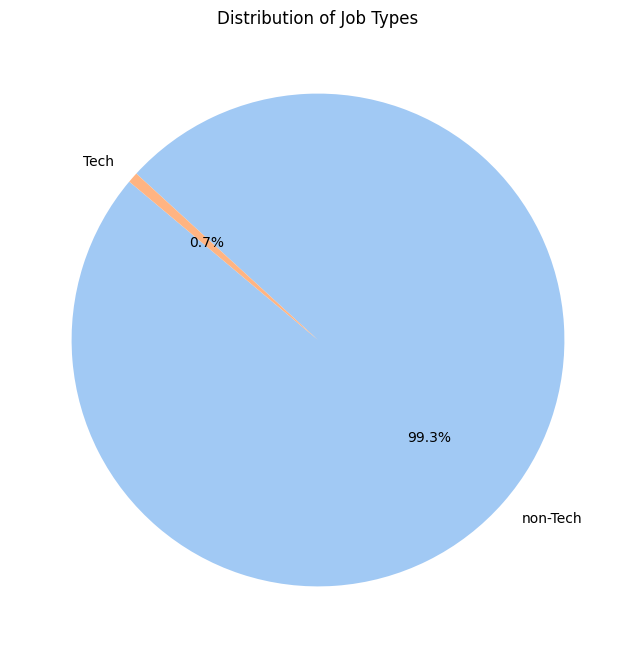

In [55]:
plt.figure(figsize=(8, 8))
job_type_counts = df['type'].value_counts()
plt.pie(
    job_type_counts,
    labels=job_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of Job Types")
plt.show()

  # Output:
"""
Key Observations:
Non-Tech Dominance:
99.3% of the job applications in this dataset are for non-Tech roles, showing a significant focus on non-technical positions.
Limited Tech Roles:
Only 0.7% of the job applications are for Tech roles, highlighting that technical roles are rare in this dataset.
Industry Focus:
This distribution suggests that the companies in the dataset (Siemens, Boeing, Apple) predominantly focus on non-Tech sectors, such as manufacturing, mechanics, or design, with minimal investment in Tech roles.

Implications:
For Job Seekers:
Candidates in non-Tech fields will find abundant opportunities.
Tech professionals might find limited roles, with Apple being the key provider.
For Employers:
Companies with heavy non-Tech representation (e.g., Boeing and Siemens) might consider diversifying into Tech roles to attract broader talent pools.
Apple could evaluate expanding its portfolio into non-Tech roles to balance job offerings.
"""

# Visualization 2: Heatmap Using Categorical Variables

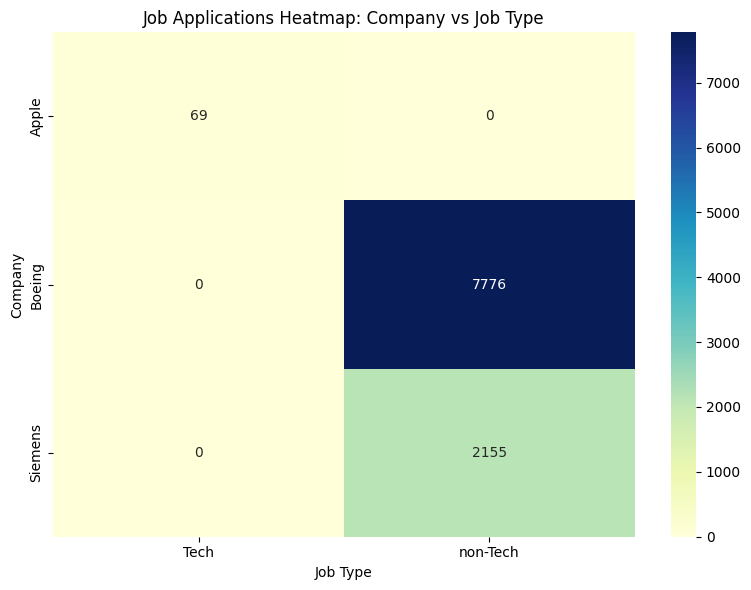

In [56]:
heatmap_data = pd.crosstab(df['company'], df['type'])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Job Applications Heatmap: Company vs Job Type")
plt.xlabel("Job Type")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# OUTPUT:
"""
Key Observations:

Apple Focuses Exclusively on Tech Jobs:
Apple only has 69 job applications for Tech roles and zero for non-Tech roles.
This suggests Apple is a predominantly Tech-focused company in this dataset.
Boeing Dominates Non-Tech Roles:
Boeing accounts for the largest share of non-Tech job applications, with 7,776 applications.
Boeing has no representation in Tech roles, highlighting its specialization in non-Tech fields (e.g., mechanics or design roles).
Siemens Also Specializes in Non-Tech Jobs:
Siemens has 2,155 applications, all for non-Tech roles.
Similar to Boeing, Siemens has no representation in Tech roles, indicating its focus on industries requiring non-Tech expertise.
No Overlap Between Tech and Non-Tech:
Each company exclusively focuses on either Tech or non-Tech roles, with no overlap. This suggests a distinct separation in the type of roles these companies offer.

Implications:

For Job Seekers:
Tech Professionals: Apple is the sole company providing opportunities in the Tech category.
Non-Tech Professionals: Boeing and Siemens dominate the non-Tech sector, offering numerous opportunities for roles like mechanics and design.
For Employers:
Apple: May consider expanding its offerings into non-Tech domains if there’s demand for such roles.
Boeing and Siemens: If diversifying, these companies could explore Tech roles to balance their portfolio.
Industry Insight:
The data suggests a clear segmentation of industries by job type. Apple aligns with technology, while Boeing and Siemens cater to more traditional, non-Tech industries.
"""

# Visualization 3: Stacked bar chart for Top job titles by numbers of Applications

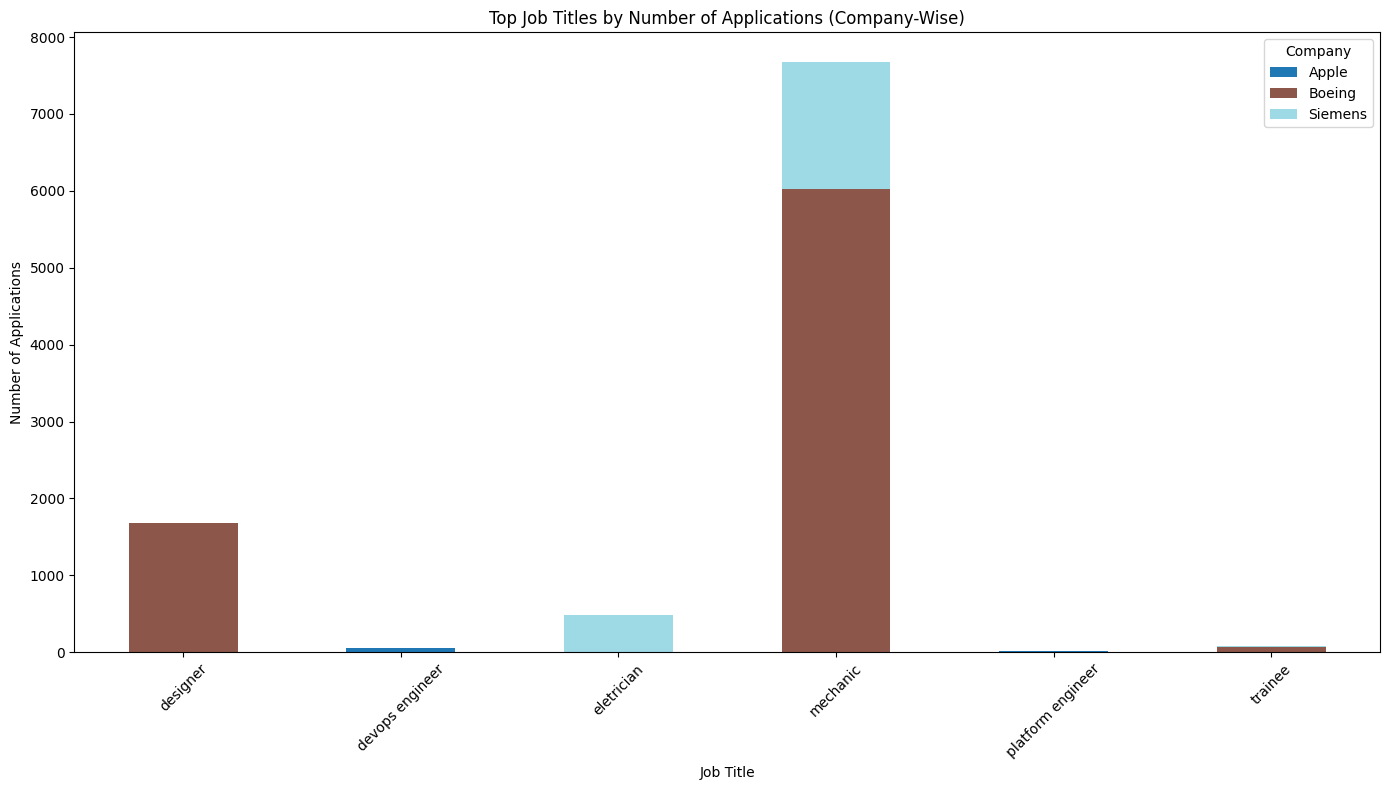

In [57]:
#Group the data by job title and company and count applications
grouped_data = df.groupby(['title', 'company']).size().reset_index(name='application_count')

# Pivot data for a stacked bar chart
pivot_data = grouped_data.pivot(index='title', columns='company', values='application_count').fillna(0)

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title("Top Job Titles by Number of Applications (Company-Wise)")
plt.xlabel("Job Title")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.legend(title="Company")
plt.tight_layout()
plt.show()

# OUTPUT:
"""
Key Observations:

Mechanic Role Dominates:
The Mechanic role has the highest number of applications, primarily driven by Boeing and partially by Siemens.
Reflects Boeing's and Siemens's focus on non-Tech roles like mechanics.

Designer Role:
The Designer role is the second most applied-for job, with all applications attributed to Boeing.
Indicates Boeing's additional demand for creative and design-based roles.

Tech Roles:
Apple is the sole contributor for Tech job titles like DevOps Engineer and Platform Engineer, but these roles have significantly fewer applications compared to non-Tech jobs.

Electrician and Trainee Roles:
Siemens has a notable number of applications for Electrician, highlighting its focus on technical trade roles.
Boeing has a small number of Trainee roles, likely targeting freshers or entry-level candidates.

Implications:

For Job Seekers:
Non-Tech Candidates: Mechanic and Designer roles at Boeing and Siemens offer the most opportunities.
Tech Professionals: Apple is the primary company for Tech roles, though the demand is minimal.

For Employers:
Apple: May need to diversify its job offerings to attract more applicants.
Boeing: Focused heavily on mechanics and design but could expand to other domains.
Siemens: Strong in technical trade roles like Electrician but could explore higher-skill job categories.
"""

# Visualization 4: Histogram for distribution of Non-tech job's Salary

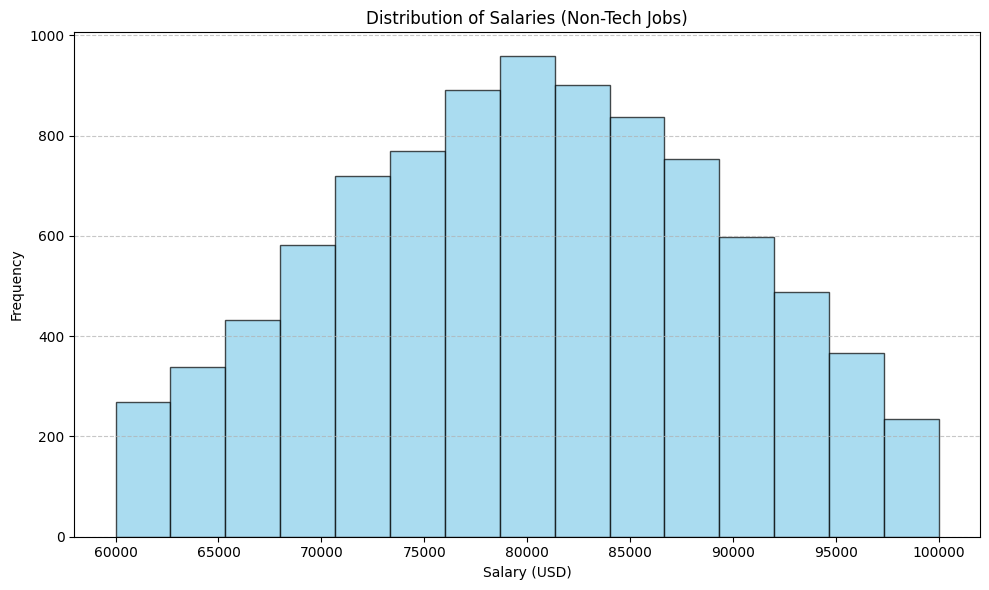

In [58]:
#Filter data for non-Tech jobs
non_tech_data = df[df['type'] == 'non-Tech']

# Plot a histogram for salary distribution (non-Tech jobs only)
plt.figure(figsize=(10, 6))
plt.hist(non_tech_data['salary'], bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Salaries (Non-Tech Jobs)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# OUTPUT:
"""
Key Observations:

Salary Range:
Salaries for non-Tech jobs mostly range between $60,000 and $100,000.
Most Common Salaries:
The peak of the histogram is centered around $75,000 to $85,000, indicating this is the most frequent salary range for non-Tech roles.
Symmetry:
The histogram shows a fairly symmetrical distribution, suggesting that the majority of salaries are close to the average range, with fewer outliers at the extremes.
Low Extremes:
Fewer roles offer salaries near the lower end ($60,000–$65,000) or the higher end ($95,000–$100,000).


Implications:

For Job Seekers:
Non-Tech candidates can expect salaries mostly around $75,000 to $85,000.
High-paying non-Tech roles are less frequent.
For Employers:
Salaries for non-Tech roles are relatively consistent; companies offering salaries in the common range are likely competitive.
"""

# Visualization 5: Line chart to see salary trend over experience groups

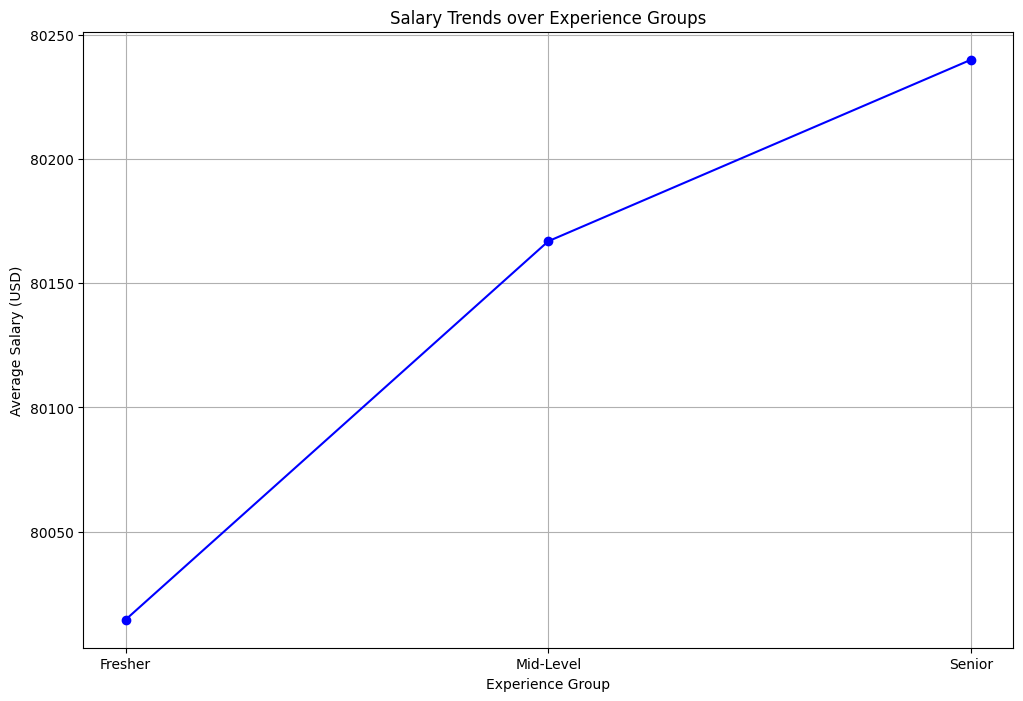

In [59]:
#Create a function to categorize experience groups
def experience_group(experience):
    if experience <= 3:
        return 'Fresher'
    elif experience == 4:
        return 'Mid-Level'
    else:
        return 'Senior'

# Apply the function to the 'experience' column
df['experience_group'] = df['experience'].apply(experience_group)

# Group by experience group and calculate the average salary
avg_salary_experience_group = df.groupby('experience_group')['salary'].mean()

# Plot the salary trends based on experience groups
plt.figure(figsize=(12, 8))
plt.plot(
    avg_salary_experience_group.index,
    avg_salary_experience_group.values,
    marker='o',
    linestyle='-',
    color='b'
)
plt.title('Salary Trends over Experience Groups')
plt.xlabel('Experience Group')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

# OUTPUT:
"""
Key Observations:

Upward Trend:
The chart shows a consistent increase in average salary with higher experience levels:
Freshers: Lowest average salary.
Mid-Level: Noticeable increase compared to Freshers.
Senior: Highest average salary among the groups.
Linear Growth:
The salary increase appears relatively linear, indicating that more experienced candidates are rewarded proportionally higher salaries.
Close Salary Ranges:
The average salaries across the groups are relatively close, with slight increments between the groups.

Implications:

For Job Seekers:
Freshers: Can expect an entry-level salary close to the lower end of the average.
Mid-Level and Seniors: Gradual salary increases with experience highlight the importance of gaining expertise over time.
For Employers:
Companies appear to be rewarding experience reasonably well.
Employers should consider offering more competitive salary increments to retain top talent as they move from Mid-Level to Senior roles.
"""

# Visualization 6: Subplot for Average salary and number of Applications by company

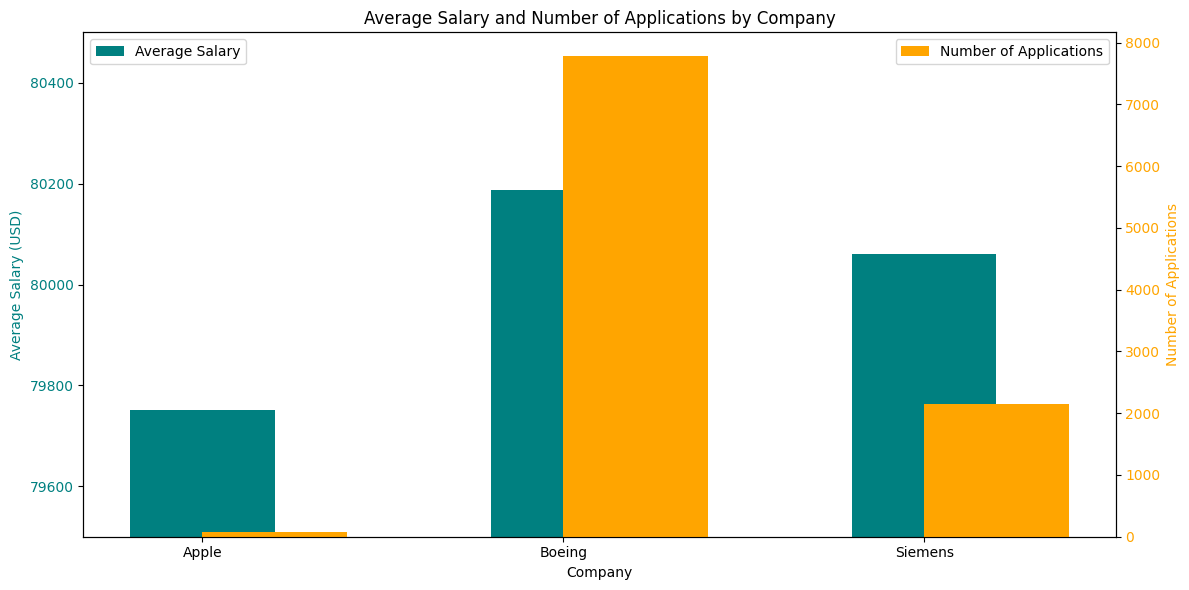

In [60]:
#Group by 'company' to calculate the average salary
avg_salary_by_company = df.groupby('company')['salary'].mean()

# Count the number of applications (unique job postings) by company
num_applications_by_company = df['company'].value_counts()

# Create a figure and subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart for average salary
ax1.bar(avg_salary_by_company.index, avg_salary_by_company.values,
        color='teal', width=0.4, label='Average Salary')
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Salary (USD)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_ylim(79500, 80500)  # Adjust to better visualize differences

# Add a secondary y-axis for the number of applications
ax2 = ax1.twinx()
ax2.bar(num_applications_by_company.index, num_applications_by_company.values,
        color='orange', width=0.4, label='Number of Applications', align='edge')
ax2.set_ylabel('Number of Applications', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title
plt.title('Average Salary and Number of Applications by Company')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# OUTPUT:
"""
Key Observations:

Boeing:
Highest Number of Applications: Boeing dominates with the largest number of applications.
Moderate Average Salary: While Boeing has a high volume of applications, its average salary is in line with Siemens and slightly lower than Apple.
Apple:
Lowest Number of Applications: Apple attracts significantly fewer applications compared to the other companies.
Highest Average Salary: Apple offers the most competitive salaries, potentially targeting niche or tech-specific roles.
Siemens:
Moderate Applications: Siemens ranks between Apple and Boeing in the number of applications.
Comparable Salary: Siemens' average salary aligns closely with Boeing, indicating similar remuneration strategies.

Implications:

For Job Seekers:
Salary Seekers: Apple is ideal for candidates seeking higher salaries.
Volume Opportunities: Boeing offers the most opportunities for applicants.

For Employers:
Apple: May need to expand its applicant pool by increasing visibility or offering diverse roles.
Boeing: Should evaluate if the high application volume corresponds to job satisfaction or role fit.
Siemens: Balances applications and salary well but can optimize further to compete with Boeing and Apple.
"""

# Visualization 7: Boxplot for Interview Difficulty by company

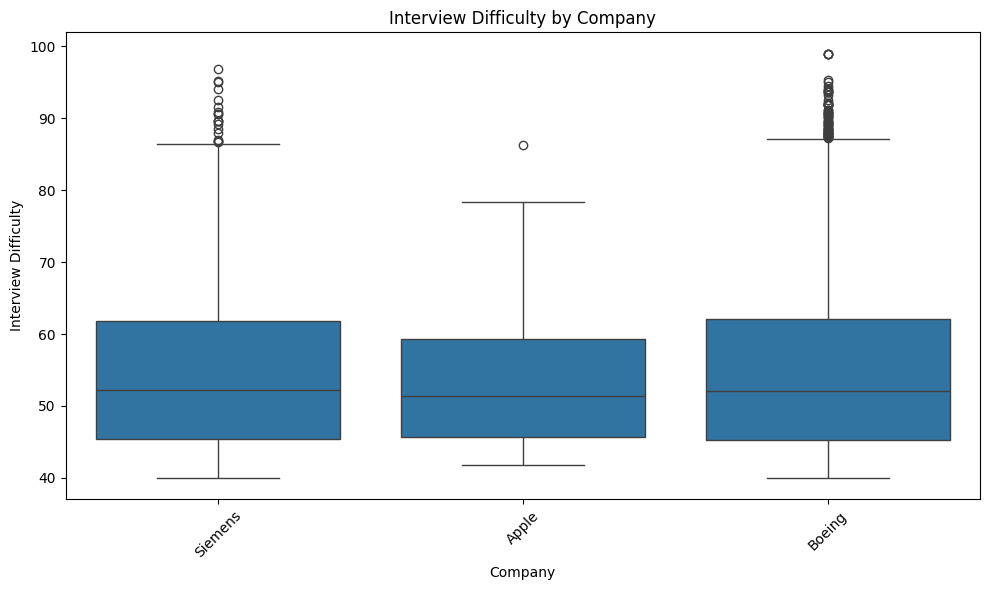

In [61]:
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x="company", y="interview_difficulty", data=df)

# Add titles and labels
plt.title("Interview Difficulty by Company")
plt.xlabel("Company")
plt.ylabel("Interview Difficulty")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# OUTPUT:
"""
Key Observations:

Median Interview Difficulty: All three companies have a median interview difficulty in a similar range, around 50 to 60. This indicates that the central tendency of interview difficulty is comparable across these companies.

Range of Difficulty:
Siemens:Siemens has a wide range of interview difficulty scores, with values ranging from approximately 40 to 90.
There are a significant number of outliers above 90, indicating some roles may be exceptionally challenging.
Apple: Apple has the narrowest range of interview difficulty, suggesting a more consistent hiring process.
Most interviews fall between 50 and 70, with one notable outlier at approximately 80.
Boeing: Boeing has a range similar to Siemens, with interview difficulty scores spread between 40 and 90.
Like Siemens, Boeing has several outliers above 90, indicating highly difficult interviews for specific roles.

Outliers: Both Siemens and Boeing show numerous outliers above the 90th percentile, suggesting that certain job roles require significantly more rigorous or challenging interview processes.

Implications:

For Job Seekers:
Candidates applying to Apple can expect a more standardized interview process with fewer extreme difficulties compared to Siemens or Boeing.
Job seekers applying to Siemens and Boeing should be prepared for variability, as interview difficulty can range widely.

For Employers:
Siemens and Boeing could consider reducing the variability in their interview processes to standardize the experience for candidates.
Apple's consistency might make it more appealing to candidates who prefer predictable hiring processes.
Overall Insights:
The presence of high outliers at Siemens and Boeing suggests that these companies might have niche roles with highly specialized requirements, leading to tougher interview processes.

"""

# Visualization 8: Histogram with KDE line for Distribution of Experience

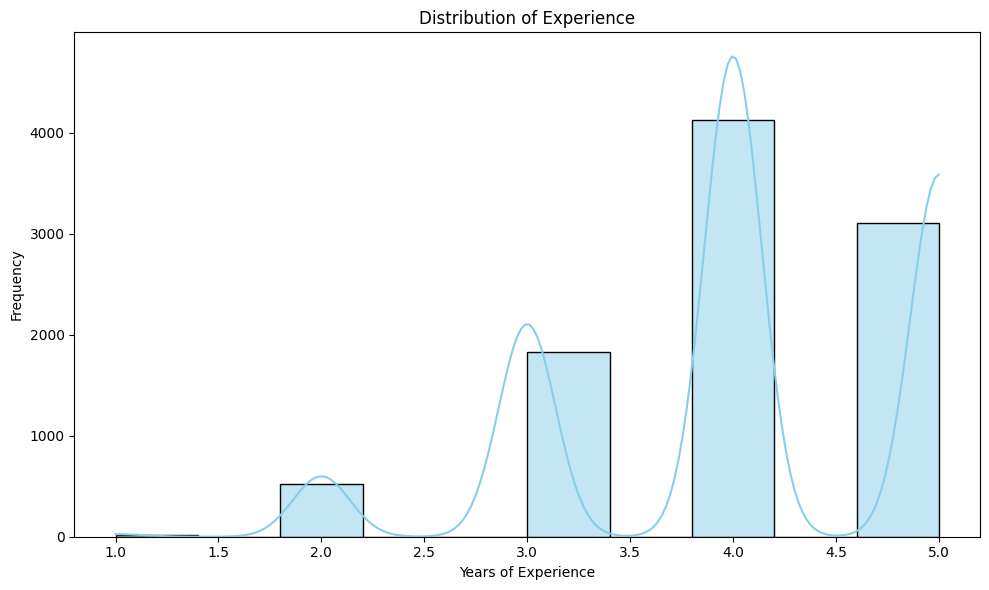

In [62]:
plt.figure(figsize=(10, 6))

# Create a histogram with a KDE line
sns.histplot(df["experience"], bins=10, kde=True, color="skyblue", edgecolor="black")

# Add titles and labels
plt.title("Distribution of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")

# Display the plot
plt.tight_layout()
plt.show()

# OUTPUT:
"""
Key Observations:

Experience Peaks:
The distribution shows two prominent peaks:
Around 3 years: The first significant cluster, indicating that many job postings target candidates with moderate experience.
At 5 years: Another cluster, likely reflecting roles that require highly experienced professionals.
These peaks suggest that the job market in this dataset primarily targets candidates with 3 to 5 years of experience.

Low Demand for Junior Roles:
There is a minimal frequency of job postings requiring less than 2 years of experience. This could indicate fewer opportunities for entry-level candidates or interns in this dataset.

High Demand for Mid-Level Roles:
Roles requiring 3 to 4 years of experience dominate the dataset, representing the most common experience level sought by employers.

Steady Tail for Senior Roles:
While 5 years of experience is a significant peak, there’s a slight drop-off beyond that, suggesting fewer positions for extremely experienced candidates (e.g., 6+ years).

For Job Seekers:
Candidates with 3 to 5 years of experience are likely to find the most opportunities in this dataset.

Entry-level candidates (<2 years of experience) might find limited options and should focus on companies with entry-level or training programs.

For Employers:
If seeking to attract highly skilled candidates, it might be beneficial to increase postings for senior roles (>5 years).
Companies targeting entry-level talent should consider creating programs or roles that cater to less experienced candidates.

"""

# Visualization 9: Scatter plot for Salary vs. Interview Difficulty with Job Type

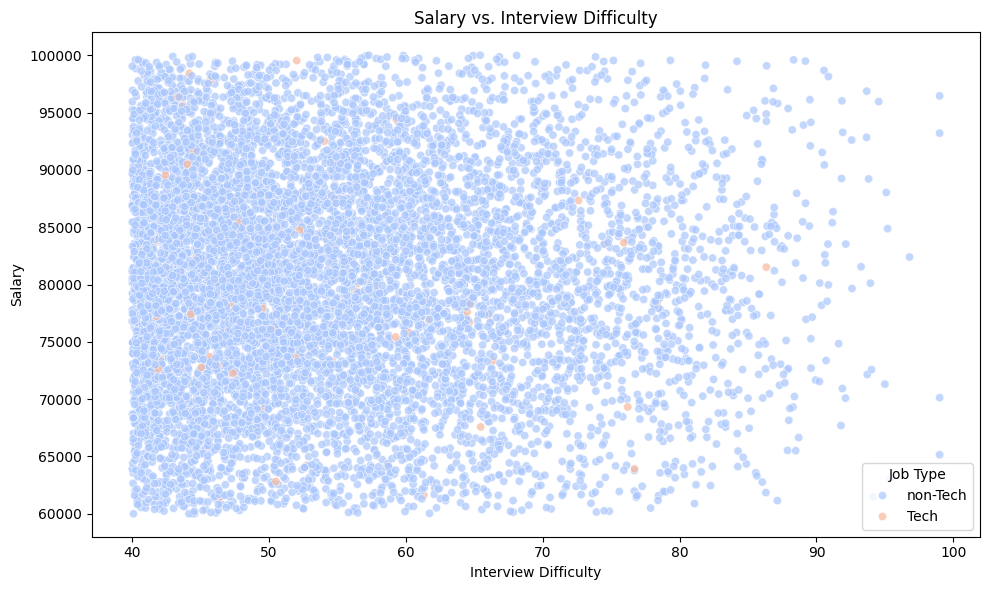

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='interview_difficulty', y='salary', hue='type', palette="coolwarm", alpha=0.7)
plt.title("Salary vs. Interview Difficulty")
plt.xlabel("Interview Difficulty")
plt.ylabel("Salary")
plt.legend(title="Job Type")
plt.tight_layout()
plt.show()

# Output:
"""
Observations:
Salary Distribution: Salaries range from $60,000 to $100,000, mostly between $75,000–$85,000.
Job Type Split: Non-Tech jobs (blue) dominate, while Tech jobs (orange) are rare.
Correlation: No clear link between Salary and Interview Difficulty; salaries are consistent across all difficulty levels.

Implications:
For Job Seekers: Focus on roles based on preference, as difficulty does not impact salary significantly.
For Employers: Align interview difficulty with salary to attract better talent; increase Tech job visibility.

"""

# CONCLUSION:
1. Majority of jobs are non-Tech (99.3%), with Tech roles at just 0.7%.
2. Boeing and Siemens dominate non-Tech applications; Apple is exclusive to Tech.
3. Salaries for non-Tech jobs are concentrated in the $75,000–$85,000 range.
4. Salaries rise significantly with experience, rewarding Senior professionals.
5. Interview difficulty varies; Apple has consistency, while Siemens/Boeing are variable.

# RECOMMENDATIONS:
1. Job Seekers: Target Boeing/Siemens for non-Tech and Apple for Tech roles.
2. Employers: Apple should diversify into non-Tech; Siemens/Boeing should add Tech roles.
3. Introduce more roles for entry-level candidates.
4. Standardize interview processes to improve candidate experiences.